#### 分析电影的发展

In [1]:
#导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib import font_manager

In [3]:
#导入数据
df=pd.read_csv('.\movies.csv')
df.head()

df=df[['id','title','genres','original_language','release_date','runtime','vote_average','vote_count','status']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722416 entries, 0 to 722415
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 722416 non-null  int64  
 1   title              722410 non-null  object 
 2   genres             511992 non-null  object 
 3   original_language  722416 non-null  object 
 4   release_date       670677 non-null  object 
 5   runtime            688061 non-null  float64
 6   vote_average       722416 non-null  float64
 7   vote_count         722416 non-null  float64
 8   status             722416 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 49.6+ MB


In [5]:
df_1=df[df.duplicated(subset=['title'])]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147089 entries, 198 to 722414
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 147089 non-null  int64  
 1   title              147084 non-null  object 
 2   genres             109776 non-null  object 
 3   original_language  147089 non-null  object 
 4   release_date       138677 non-null  object 
 5   runtime            142332 non-null  float64
 6   vote_average       147089 non-null  float64
 7   vote_count         147089 non-null  float64
 8   status             147089 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 11.2+ MB


In [6]:
#删除片名一样的数据
df['title']=df['title'].str.strip()
df=df.drop_duplicates(subset=['title'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575327 entries, 0 to 722415
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 575327 non-null  int64  
 1   title              575326 non-null  object 
 2   genres             402216 non-null  object 
 3   original_language  575327 non-null  object 
 4   release_date       532000 non-null  object 
 5   runtime            545729 non-null  float64
 6   vote_average       575327 non-null  float64
 7   vote_count         575327 non-null  float64
 8   status             575327 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 43.9+ MB


In [7]:
#删除没有上映时间的电影
df=df[df['release_date'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532000 entries, 0 to 722415
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 532000 non-null  int64  
 1   title              531999 non-null  object 
 2   genres             390831 non-null  object 
 3   original_language  532000 non-null  object 
 4   release_date       532000 non-null  object 
 5   runtime            508233 non-null  float64
 6   vote_average       532000 non-null  float64
 7   vote_count         532000 non-null  float64
 8   status             532000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 40.6+ MB


In [8]:
df['release_date']=pd.to_datetime(df['release_date']).dt.strftime('%Y')

In [9]:
df['release_date']=df['release_date'].apply(lambda x: re.sub('[^0-9]','',x)).str.strip()
df['release_date'].replace('',np.nan,inplace=True)
df=df.dropna(subset=['release_date'])
#由于数据是
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532000 entries, 0 to 722415
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 532000 non-null  int64  
 1   title              531999 non-null  object 
 2   genres             390831 non-null  object 
 3   original_language  532000 non-null  object 
 4   release_date       532000 non-null  object 
 5   runtime            508233 non-null  float64
 6   vote_average       532000 non-null  float64
 7   vote_count         532000 non-null  float64
 8   status             532000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 40.6+ MB


#### 电影年产量

In [11]:
df

,id,title,genres,original_language,release_date,runtime,vote_average,vote_count,status
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,2024,115.0,7.246,1878.0,Released
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,2023,116.0,7.079,1365.0,Released
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,2023,103.0,7.433,545.0,Released
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,2023,127.0,7.340,1007.0,Released
4,693134,Dune: Part Two,Science Fiction-Adventure,en,2024,167.0,8.300,2770.0,Released
...,...,...,...,...,...,...,...,...,...
722409,527223,Strictly Modern,Comedy-Romance,en,1930,63.0,0.000,0.0,Released
722410,903969,Noch eine Axt,Drama-Comedy-Romance,de,2024,0.0,0.000,0.0,Released
722411,441621,Pipa the Frog,Animation,ru,1992,4.0,0.000,0.0,Released
722412,262212,What a Woman Made,NaN,ja,1973,11.0,0.000,0.0,Released


In [12]:
#计算各年度电影数量
num=df.groupby(by=['release_date'])['title'].count()

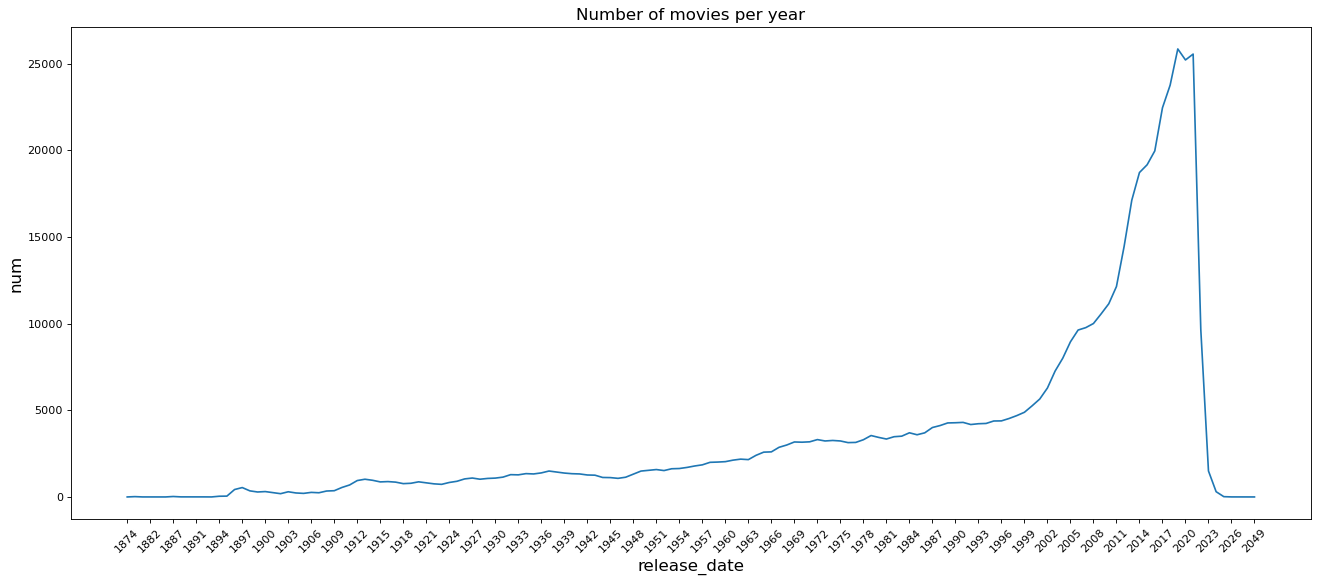

In [13]:
#绘制折线图

plt.figure(figsize=[20,8],dpi=80)
           
num.plot(x=range(len(list(num.index))),y=num.values)

plt.xticks(range(len(list(num.index)))[::3],list(num.index)[::3],rotation=45)
plt.xlabel('release_date',fontsize=15)
plt.ylabel('num',fontsize=15)
plt.title('Number of movies per year',fontsize=15)

plt.savefig('.\各年电影总产量.png')
            
plt.show()

##### 从中可以看出，在上世纪90年代之前，电影产生的增速较慢；从90年代后，电影的总产量开始大幅度增加，特别是进入20世纪后呈指数倍增加.说明随着经济的增长，人们开始注重精神生活.

#### 历年电影平均评分

In [16]:
#计算各年平均评分
avg_score=round(df[df['vote_average']>0].groupby(by=['release_date'])['vote_average'].mean(),2)

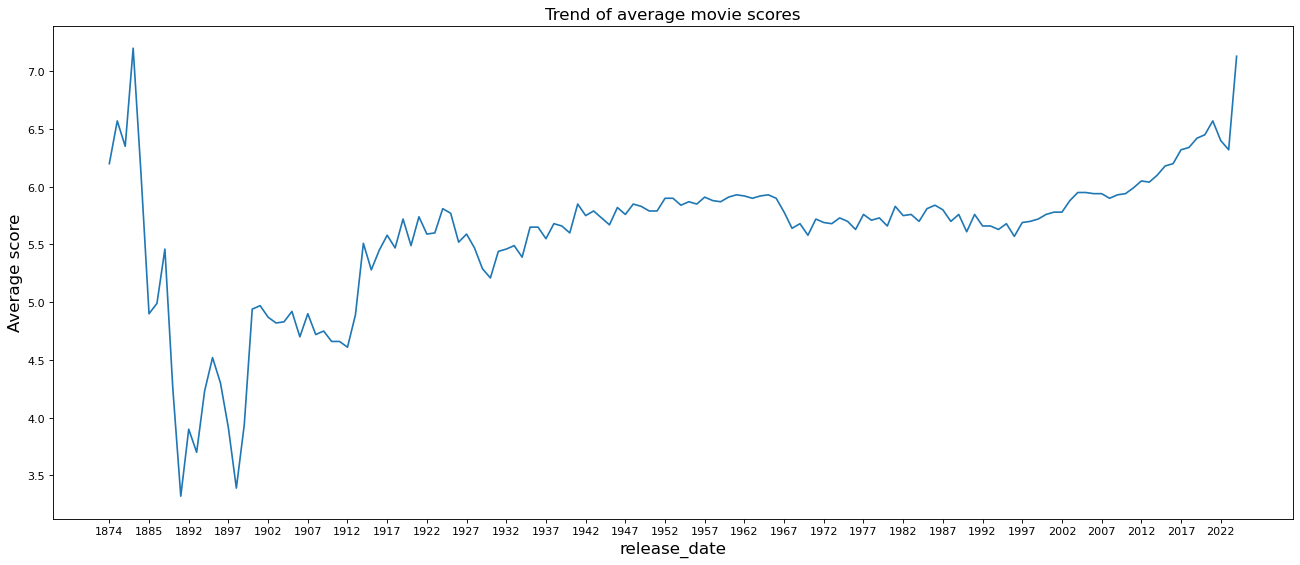

In [18]:
#绘制平均分趋势

plt.figure(figsize=[20,8],dpi=80)

avg_score.plot(x=avg_score.index,y=avg_score.values)

plt.xticks(range(len(list(avg_score.index)))[::5],list(avg_score.index)[::5])
plt.xlabel('release_date',fontsize=15)
plt.ylabel('Average score',fontsize=15)
plt.title('Trend of average movie scores',fontsize=15)

plt.savefig('.\电影平均分趋势.png')

plt.show()

##### 从图中可以看出，在19世纪到20世纪初，虽然电影产出变多，但评分较为稳定，说明电影质量水平一直保持在稳定的水平，但从评分看，平均评分在5.5至6.0间，说明电影质量一般.同时，从20世纪初开始，总体评分呈上升趋势，说明电影质量变高，符合大众的需求.

#### 电影评分

In [25]:
df.describe()

,id,runtime,vote_average,vote_count
count,532000.000000,508233.000000,532000.000000,532000.000000
mean,510280.631271,54.267348,2.543478,36.358216
std,259237.184399,113.794468,3.191134,452.787055
min,2.000000,0.000000,0.000000,0.000000
25%,307422.750000,6.000000,0.000000,0.000000
50%,507164.500000,54.000000,0.000000,0.000000
75%,727049.500000,90.000000,5.700000,2.000000
max,968155.000000,51420.000000,10.000000,33262.000000


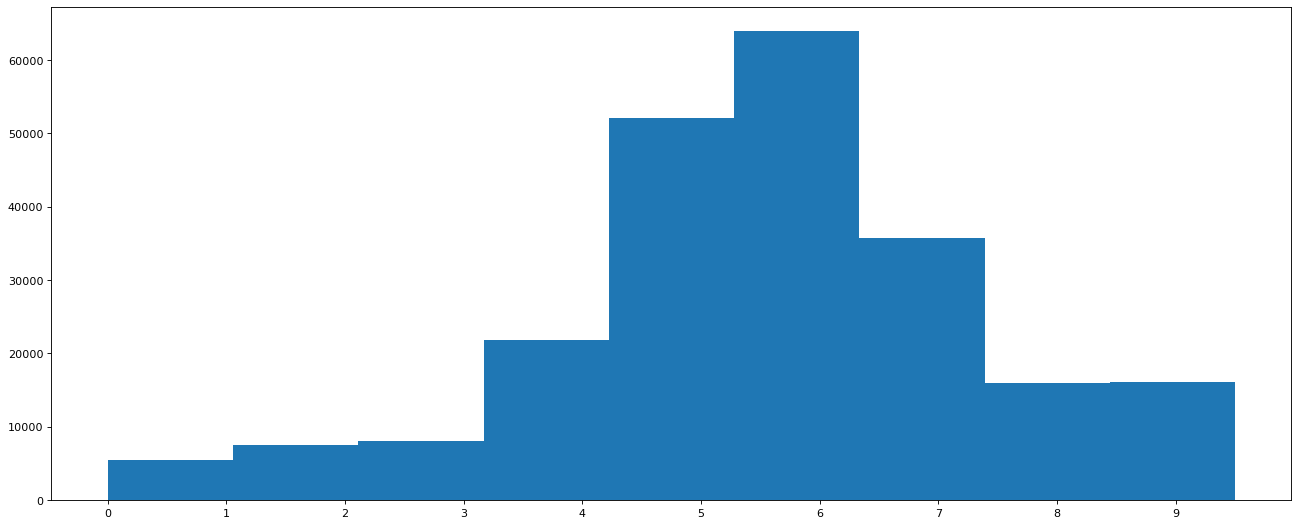

In [26]:
#查看电影评分分布

d=1
sc=df[df['vote_average']>0]['vote_average']
num_bins = int((max(sc)-min(sc))//d)

plt.figure(figsize=[20,8],dpi=80)

#坐标轴
x=list(x-0.5 for x in range(11))
_x=list(x-1 for x in range(11))
plt.xticks(x,_x)

plt.hist(sc,num_bins)

plt.savefig('.\电影评分.png')

plt.show()

##### 从图中可以看出5-7分，低分，高分的电影都不多

#### 电影类型

In [29]:
df['genres']=df['genres'].str.split('-')

In [30]:
#使用 explode() 方法展开 genres 列 ，并将结果赋给一个新的变量
df1=df[df['genres'].notnull()].explode('genres')

#去掉多余的空格
df1['genres']=df1['genres'].str.strip()

#重置索引
df1=df1.reset_index(drop=True)

#计数
genres=df1['genres'].value_counts()

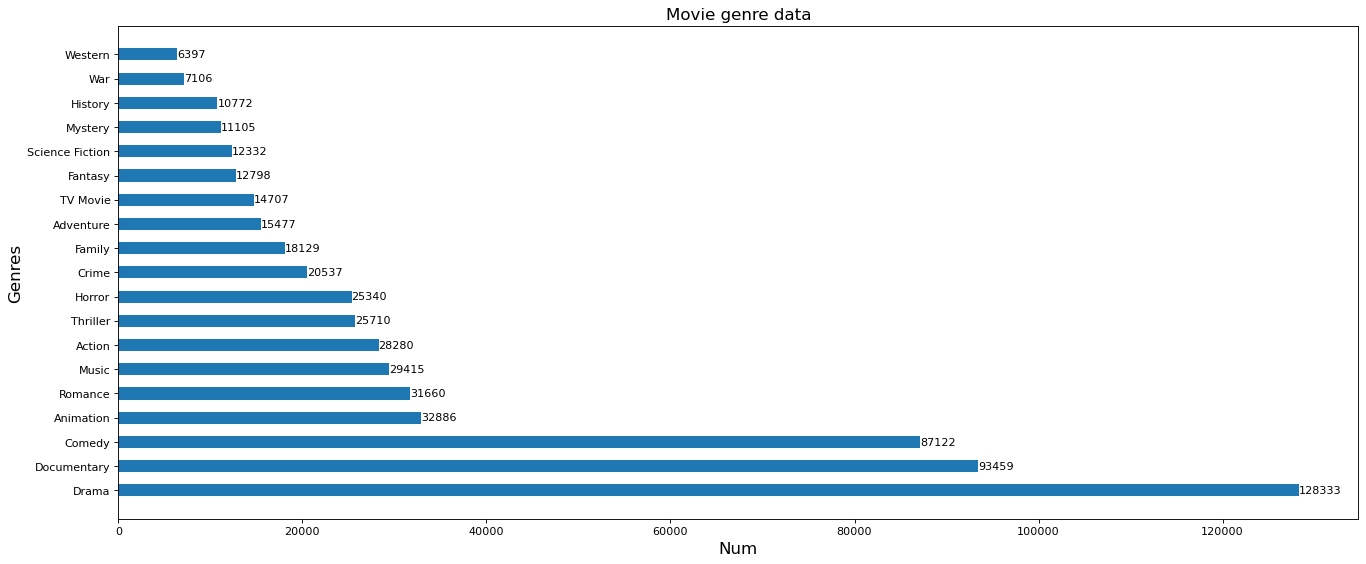

In [31]:
#绘图

plt.figure(figsize=[20,8],dpi=80)

bars=plt.barh(genres.index,genres.values,height=0.5)

#在图上显示数据
x=genres.index
y=genres.values
for bar,a,b in zip(bars,x,y):
    x=bar.get_x()+b
    y=a
    plt.text(x,y,str(b),va='center',color='black')

#标签
plt.xlabel('Num',fontsize=15)
plt.ylabel('Genres',fontsize=15)
plt.title('Movie genre data',fontsize=15)

plt.savefig('.\电影类型.png')

plt.show()

##### 由图中数据可以知道，现代电影的类型最多的是剧情片，其次是纪录片和喜剧片，从侧面反映了现代人们更喜欢看剧情片、纪录片和喜剧.

#### 不同语言的电影

In [35]:
#计算不同地区电影的数量
lan=df[df['original_language'].notnull()]
lan['original_language']=lan['original_language'].str.strip()
lan=lan['original_language'].value_counts()

#将总量少于10000部的电影语言改为other
lan=lan.reset_index()
lan.loc[lan['count']<10000,'original_language']='other'
lan=lan.groupby(by=['original_language'])['count'].sum().sort_values()

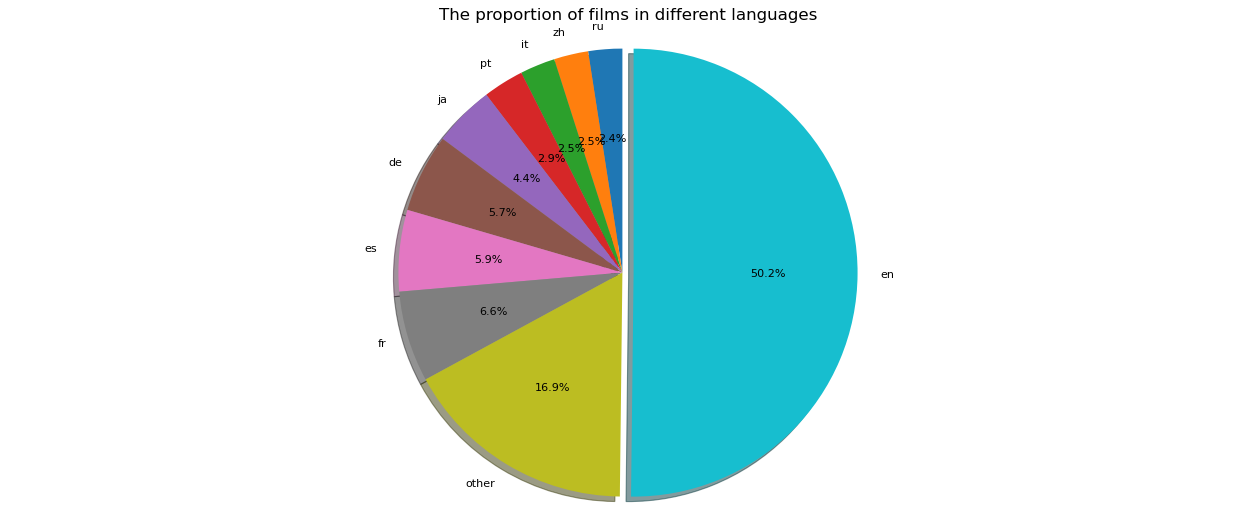

In [36]:
#绘图

plt.figure(figsize=[20,8],dpi=80)

explode=[0,0,0,0,0,0,0,0,0,0.05]
plt.pie(lan.values,labels=lan.index,autopct='%1.1f%%',explode=explode,startangle=90,shadow=True)

plt.title('The proportion of films in different languages',fontsize=15)
plt.axis('equal')

plt.savefig('.\不同语言的电影比')
plt.show()

###### 由图中可以看出，英文电影在市场上的占比最高，超过了一半，就单语言电影相比，英语电影占比50.2%,而第二名的法国电影仅占比6.6%

#### 分析与结论
##### 1.随着人们生活水平的提高，电影成为了人们娱乐的一种方式，因此电影发展迅速，尤其进入20世纪后，电影的产量以指数式增长;
##### 2.虽然电影的产量不断增加，但评分有上升趋势，表明电影的质量并没有因为数量的增加而下降，但也可以看出虽然评分没有下降，但评分大多数集中在5-7分左右，表明
高质量电影仍然较少，要增加高质量电影的输出;
##### 3.在当今电影中，英语类的电影占据了市场的绝大部分，是其它电影的7倍，乃至10倍以上，西方文化的输出的力度很大，要加强我国电影的质量，让其走向国际.